In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/harshit2000/BVP-RA-Training/main/Assignment%201/Task/insurance_data.csv')

In [6]:
data.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [7]:
data.isnull().sum()

age                 0
affordibility       0
bought_insurance    0
dtype: int64

In [8]:
data.describe()

,age,affordibility,bought_insurance
count,28.000000,28.000000,28.000000
mean,39.892857,0.678571,0.500000
std,15.497525,0.475595,0.509175
min,18.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,45.500000,1.000000,0.500000
75%,54.250000,1.000000,1.000000
max,62.000000,1.000000,1.000000


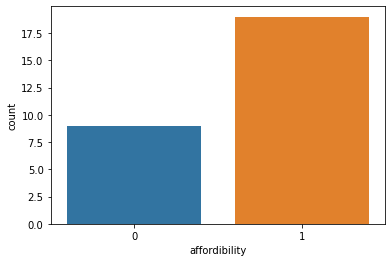

In [9]:
sns.countplot(x=data['affordibility'])

In [10]:
data.corr()['bought_insurance'].sort_values()

affordibility       0.382360
age                 0.701694
bought_insurance    1.000000
Name: bought_insurance, dtype: float64

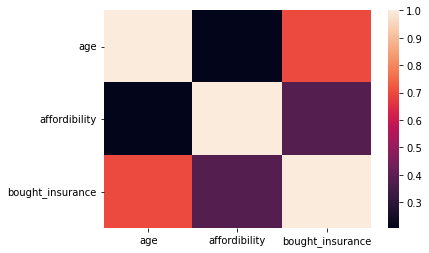

In [11]:
sns.heatmap(data.corr())

In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [27]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [29]:
feature_set=data.drop('bought_insurance',axis=1)
labels=np.array(data['bought_insurance'])
labels=labels.reshape(28,1)
np.random.seed(50)
weights=np.random.rand(2,1)
bias=np.random.rand(1)
lr=0.001

In [31]:
for epoch in range(6000):
    inputs=feature_set
    
    y=np.dot(feature_set,weights)+bias
    z=sigmoid(y)
    
    error=z-labels
    print(error.sum())
    
    dcost_dpred=error
    dpred_dz=sigmoid_der(z)
    
    z_delta=dcost_dpred*dpred_dz
    
    inputs=feature_set.T
    weights-=lr*np.dot(inputs,z_delta)
    
    for num in z_delta:
        bias-=lr*num

Streaming output truncated to the last 5000 lines.
0.08143448957034782
0.08142565190869389
0.08141681486098784
0.08140797842711733
0.08139914260708192
0.08139030740078734
0.08138147280818442
0.08137263882920864
0.08136380546381206
0.08135497271192371
0.08134614057350842
0.0813373090484718
0.08132847813678457
0.08131964783837442
0.08131081815318342
0.0813019890811627
0.08129316062223213
0.0812843327763827
0.08127550554347629
0.08126667892352779
0.08125785291643428
0.08124902752214946
0.08124020274064259
0.08123137857181251
0.08122255501561515
0.08121373207200455
0.08120490974089678
0.08119608802226863
0.08118726691603506
0.08117844642214833
0.08116962654054272
0.08116080727115993
0.08115198861394457
0.08114317056885667
0.08113435313579676
0.08112553631474062
0.08111672010562188
0.08110790450837924
0.08109908952295175
0.08109027514927136
0.08108146138730143
0.08107264823697546
0.08106383569822606
0.08105502377100993
0.08104621245525723
0.08103740175091478
0.08102859165791643
0.0810197821

CASE1 - (AGE: 49, AFFORDABILITY: 1)

In [33]:
single_point=np.array([49,1])
result=sigmoid(np.dot(single_point,weights)+bias)
print(result)

[0.81287873]


CASE2 (AGE: 24, AFFORDABILITY: 0)

In [34]:
single_point=np.array([24,0])
result=sigmoid(np.dot(single_point,weights)+bias)
print(result)

[0.04695606]
